Neural Networks

In [3]:
!pip install tensorflow

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
mnist = tf.keras.datasets.mnist
#Importamos data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train
#3 brackets de inicio = 3 dimensiones
#array([[[

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train.shape
#Comprobamos que tiene 3 dimensiones
#Hay 60 mil observaciones
#28x28 es el tamaño de la imagen

(60000, 28, 28)

In [7]:
X_train[0]
#El primer valor del dataset
#0-255 brightness

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
p = X_train[10]
#Le sacamos una dimensión para poder printearlo (porque tiene 3)
import matplotlib.pyplot as plt

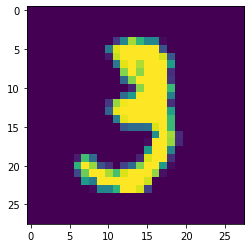

In [13]:
plt.imshow(p)
plt.show()
#Los valores 0 son los violetas

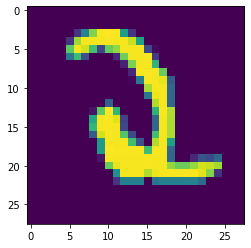

In [14]:
plt.imshow(X_train[400])
plt.show()

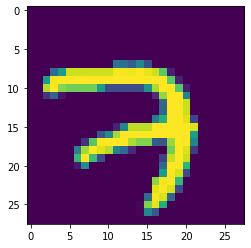

In [12]:
plt.imshow(X_train[5000])
plt.show()

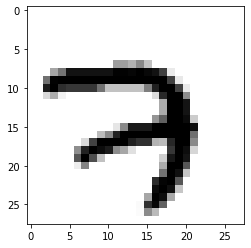

In [23]:
plt.imshow(X_train[5000], cmap = 'gist_gray_r')
plt.show()
#Esta es la representación real de las imagenes de mnist
#Los colores violetas y amarillos son de matplotlib

In [15]:
#Trabajo a realizar siempre que trabajamos con imágenes:
#Como el rango va de 0 a 255 vamos a comprimirlos entre 0 y 1
X_train, X_test = X_train/255, X_test/255

In [25]:
#Una vez comprimido, hacemos el modelo
#Vamos a hacer un modelo secuencial de varias capas
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), 
tf.keras.layers.Dense(128, activation = 'relu'), 
tf.keras.layers.Dense(10)])

In [28]:
#Predicción
predictions = model(X_train[:1]).numpy()
predictions

array([[-0.21270362, -0.46125084, -0.2593354 ,  0.8283456 ,  0.7282031 ,
         0.30239755,  0.0414024 , -0.10927601,  1.0072606 , -0.02753391]],
      dtype=float32)

In [29]:
tf.nn.softmax(predictions).numpy()

array([[0.05955418, 0.04644827, 0.05684081, 0.16866857, 0.15259588,
        0.09968225, 0.0767837 , 0.06604353, 0.20171395, 0.07166885]],
      dtype=float32)

In [30]:
#Función de pérdida: dif entre valor real y pronosticado
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.3057678

In [33]:
model.compile(optimizer='adam', loss = loss_fn, metrics = ['accuracy'])

In [34]:
#Fitteamos modelo con 5 pasos
model.fit(X_train, y_train, epochs=5)

#Accuracy: cuán certero es en clasificar una imagen como un número
#De 100 imgs le acierta a 98

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2597 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1145 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0790 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0605 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0463 - accuracy: 0.9855
